# Introduction to Convolutional Neural Network and Computer Vision with TensorFlow

## Get the Data

source: www.kaggle.com/dansbecker/food-101

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-01-24 11:43:20--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.217.128, 108.177.12.128, 108.177.13.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.217.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  33.5MB/s    in 3.1s    

2023-01-24 11:43:24 (33.5 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with it)

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train/

pizza  steak


In [4]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [5]:
import os

# Walk through pizza_steak directiory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(filenames)} images in `{dirpath}`")

There are 0 images in `pizza_steak`
There are 0 images in `pizza_steak/train`
There are 750 images in `pizza_steak/train/steak`
There are 750 images in `pizza_steak/train/pizza`
There are 0 images in `pizza_steak/test`
There are 250 images in `pizza_steak/test/steak`
There are 250 images in `pizza_steak/test/pizza`


In [6]:
# The extra fille in our pizza+steak directory is ".DS_Store"
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Jan 24 11:43 .
drwxr-xr-x 3 root root 4096 Jan 24 11:43 ..
drwxr-xr-x 4 root root 4096 Jan 24 11:43 test
drwxr-xr-x 4 root root 4096 Jan 24 11:43 train


In [7]:
# Another way to find out how many images in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visualize our images, first let's get the class names programatically

In [8]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names from the subdirectory
print(class_names)

['pizza' 'steak']


In [9]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot  it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

['628628.jpg']
Image shape: (512, 512, 3)


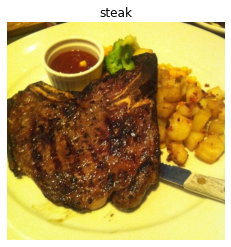

In [10]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

In [11]:
# The images we've imported and plotted are actually giant arrays/tensors of different pixel values
import tensorflow as tf
tf.constant(img)

2023-01-24 11:43:35.484026: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-24 11:43:35.484941: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-24 11:43:35.613389: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-24 11:43:35.614224: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-24 11:43:35.615028: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[169,  96,   0],
        [169,  96,   0],
        [173, 100,   0],
        ...,
        [ 57,  39,  19],
        [ 58,  40,  20],
        [ 61,  40,  21]],

       [[174, 102,   0],
        [175, 103,   1],
        [178, 106,   6],
        ...,
        [ 54,  36,  14],
        [ 57,  39,  17],
        [ 59,  41,  17]],

       [[177, 108,   7],
        [180, 110,  12],
        [181, 111,  13],
        ...,
        [ 55,  38,  12],
        [ 58,  41,  15],
        [ 60,  43,  15]],

       ...,

       [[243, 243, 113],
        [245, 245, 113],
        [243, 243, 111],
        ...,
        [245, 248, 161],
        [246, 249, 160],
        [248, 251, 162]],

       [[242, 241, 115],
        [246, 245, 118],
        [244, 244, 114],
        ...,
        [240, 243, 154],
        [243, 246, 157],
        [249, 252, 163]],

       [[240, 238, 115],
        [246, 245, 119],
        [244, 243, 116],
        ...,
        [240, 243, 15

In [12]:
# View the image shaoe
img.shape # returns (width, height, color channels)

(512, 512, 3)

In [13]:
# Get all theh pixel values between 0 & 1
img/255.

array([[[0.6627451 , 0.37647059, 0.        ],
        [0.6627451 , 0.37647059, 0.        ],
        [0.67843137, 0.39215686, 0.        ],
        ...,
        [0.22352941, 0.15294118, 0.0745098 ],
        [0.22745098, 0.15686275, 0.07843137],
        [0.23921569, 0.15686275, 0.08235294]],

       [[0.68235294, 0.4       , 0.        ],
        [0.68627451, 0.40392157, 0.00392157],
        [0.69803922, 0.41568627, 0.02352941],
        ...,
        [0.21176471, 0.14117647, 0.05490196],
        [0.22352941, 0.15294118, 0.06666667],
        [0.23137255, 0.16078431, 0.06666667]],

       [[0.69411765, 0.42352941, 0.02745098],
        [0.70588235, 0.43137255, 0.04705882],
        [0.70980392, 0.43529412, 0.05098039],
        ...,
        [0.21568627, 0.14901961, 0.04705882],
        [0.22745098, 0.16078431, 0.05882353],
        [0.23529412, 0.16862745, 0.05882353]],

       ...,

       [[0.95294118, 0.95294118, 0.44313725],
        [0.96078431, 0.96078431, 0.44313725],
        [0.95294118, 0

## An end-to-end example

Let's build a CNN to find patterns in our images, more specifically we a need way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fot the CNN to our training data

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (Scalling/Normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directory
train_dir =  "pizza_steak/train"
test_dir =  "pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN 
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data, 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


2023-01-24 11:43:41.156805: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5


2023-01-24 11:43:43.190877: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


47/47 [==============================] - 21s 244ms/step - loss: 0.5845 - accuracy: 0.6807 - val_loss: 0.4449 - val_accuracy: 0.8000
Epoch 2/5
47/47 [==============================] - 10s 215ms/step - loss: 0.4243 - accuracy: 0.8127 - val_loss: 0.3306 - val_accuracy: 0.8520
Epoch 3/5
47/47 [==============================] - 10s 213ms/step - loss: 0.3991 - accuracy: 0.8333 - val_loss: 0.3067 - val_accuracy: 0.8600
Epoch 4/5
47/47 [==============================] - 11s 229ms/step - loss: 0.3663 - accuracy: 0.8347 - val_loss: 0.3103 - val_accuracy: 0.8800
Epoch 5/5
47/47 [==============================] - 11s 226ms/step - loss: 0.3314 - accuracy: 0.8687 - val_loss: 0.3304 - val_accuracy: 0.8580


In [15]:
# Get a model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

Practice : https://poloclub.github.io/cnn-explainer/

## Using the same as before

replicate [tensorflow playground](playground.tensorflow.org) to see if it works in our image data

In [16]:
# Set random seed
tf.random.set_seed(42)

# Create a model  to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 215ms/step - loss: 0.7212 - accuracy: 0.4933 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 10s 202ms/step - loss: 0.6966 - accuracy: 0.4993 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 199ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 10s 203ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 10s 213ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [17]:
# Get a summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 602116    
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Set the random seed
tf.random.set_seed(42)

# Create the model (same as before but let's step it up a notch)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 199ms/step - loss: 3.8217 - accuracy: 0.6113 - val_loss: 0.7407 - val_accuracy: 0.7340
Epoch 2/5
47/47 [==============================] - 9s 200ms/step - loss: 1.1290 - accuracy: 0.6880 - val_loss: 0.9885 - val_accuracy: 0.6200
Epoch 3/5
47/47 [==============================] - 10s 219ms/step - loss: 0.5409 - accuracy: 0.7673 - val_loss: 0.4696 - val_accuracy: 0.7800
Epoch 4/5
47/47 [==============================] - 10s 209ms/step - loss: 0.5463 - accuracy: 0.7480 - val_loss: 1.1135 - val_accuracy: 0.6200
Epoch 5/5
47/47 [==============================] - 9s 200ms/step - loss: 0.6997 - accuracy: 0.7313 - val_loss: 0.6373 - val_accuracy: 0.7600


In [19]:
# Get a summary of model_3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


## Binary Classification: Let's Break it Down!

1. Become one with the data (Visualize, visualize, visualize)
2. Preprocess the data: Scaling/Normalizing
3. Created a model
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model
7. Repeat it until statisfied (experiment, experiment, experiment)



### 1. Become one with the Data

['2995169.jpg']
Image shape: (512, 512, 3)
['218142.jpg']
Image shape: (512, 382, 3)


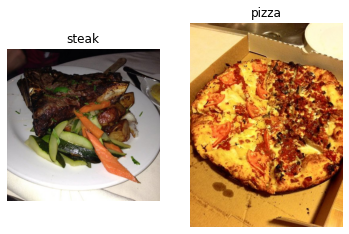

In [20]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
steak_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the Data

In [21]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turnn our data into batches

Kenapa perlu diubah ke batches:
1. 10,000 images mungkin ga cukup di memory GPU
2. Trying to learn patterns of 10,000 images in one hit, bisa jadi modelnya ga belajar dengan baik

Kenapa 32?

Bagus aja...

In [22]:
!nvidia-smi

Tue Jan 24 11:46:35 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.82.01    Driver Version: 470.82.01    CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P0    27W /  70W |  14570MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  Tesla T4            Off  | 00000000:00:05.0 Off |                    0 |
| N/A   

In [23]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [24]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [25]:
# Get a sample of a train data batch
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [26]:
# How many batches are there
len(train_data)

47

In [27]:
# 47 dari sini
1500/32

46.875

In [28]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

### 3. Create a CNN model (start with a baseline)

In [29]:
# Make the creating of our model a little easeier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [30]:
# Create the model (this will be our baseline)
model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding="valid",
           activation="relu",
           input_shape=(224, 224, 3)), # Input layer harus specify shape
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [31]:
# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [32]:
# Get a summary of our model
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_3 (Flatten)          (None, 475240)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 4. Fit the model

In [33]:
 # Checkt the lengths of training and test data generators
 len(train_data), len(test_data)

(47, 16)

In [34]:
# fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data)) 

Epoch 1/5
47/47 [==============================] - 12s 235ms/step - loss: 1.2256 - accuracy: 0.6580 - val_loss: 0.4654 - val_accuracy: 0.8020
Epoch 2/5
47/47 [==============================] - 10s 210ms/step - loss: 0.4596 - accuracy: 0.7980 - val_loss: 0.4001 - val_accuracy: 0.8340
Epoch 3/5
47/47 [==============================] - 10s 215ms/step - loss: 0.3326 - accuracy: 0.8680 - val_loss: 0.3780 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 11s 233ms/step - loss: 0.1663 - accuracy: 0.9447 - val_loss: 0.4992 - val_accuracy: 0.7540
Epoch 5/5
47/47 [==============================] - 10s 212ms/step - loss: 0.0719 - accuracy: 0.9827 - val_loss: 0.7081 - val_accuracy: 0.7380


### 5. Evaluating our model

<AxesSubplot:>

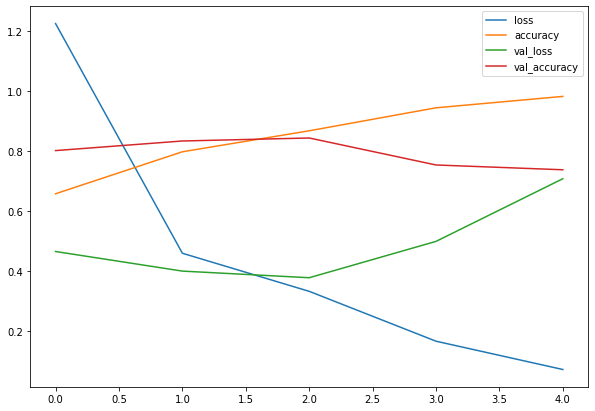

In [35]:
# Let's plot the learning curve
import pandas as pd

pd.DataFrame(history_4.history).plot(figsize=(10, 7))

In [36]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separates loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # Plot loss
  plt.figure(figsize=(10,7))
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure(figsize=(10,7))
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

Kalau val_loss trendnya naik (atau pokoknya ga down trend) it's likely overfitting

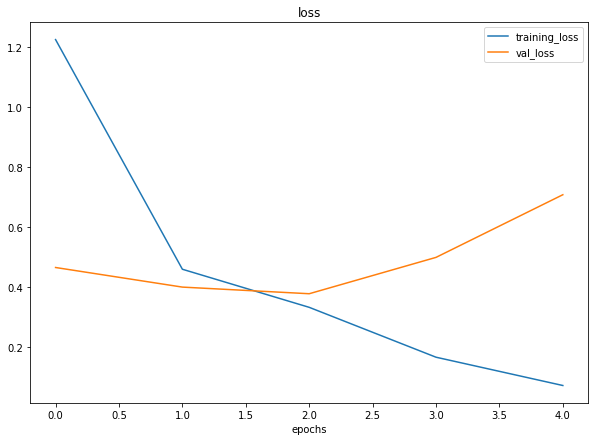

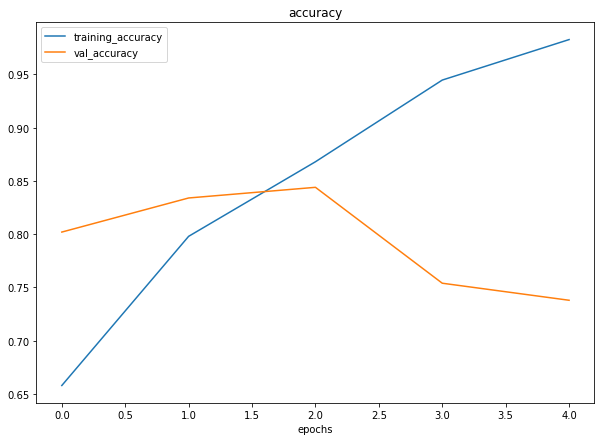

In [37]:
# Checkout the loss and accuracy of model_4
plot_loss_curves(history_4)

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a basline
1. Beat the basline by overfitting a larger model
2. Reduce overfitting

ways to induce overfitting:

* Increase the nomber of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer

Reduce Overfitting:

* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data


In [38]:
# Create the model (this is going to be our new basline)
model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [39]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 220ms/step - loss: 0.6373 - accuracy: 0.6260 - val_loss: 0.4695 - val_accuracy: 0.7960
Epoch 2/5
47/47 [==============================] - 10s 207ms/step - loss: 0.4703 - accuracy: 0.7920 - val_loss: 0.3939 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 10s 214ms/step - loss: 0.4344 - accuracy: 0.8067 - val_loss: 0.3713 - val_accuracy: 0.8560
Epoch 4/5
47/47 [==============================] - 10s 206ms/step - loss: 0.4367 - accuracy: 0.8093 - val_loss: 0.3762 - val_accuracy: 0.8560
Epoch 5/5
47/47 [==============================] - 10s 216ms/step - loss: 0.3952 - accuracy: 0.8353 - val_loss: 0.4493 - val_accuracy: 0.7740


In [40]:
# Get the summary of our model with Max Pooling
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6760)             

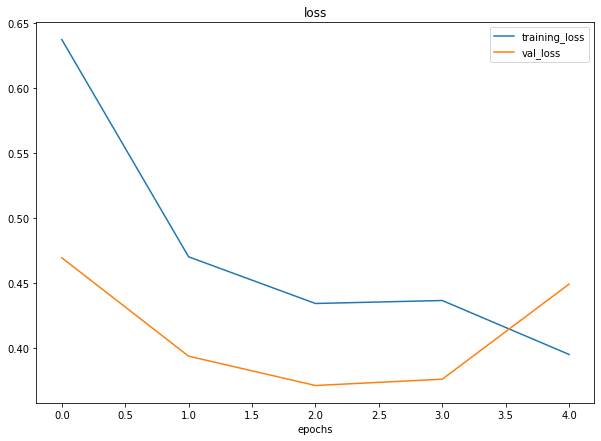

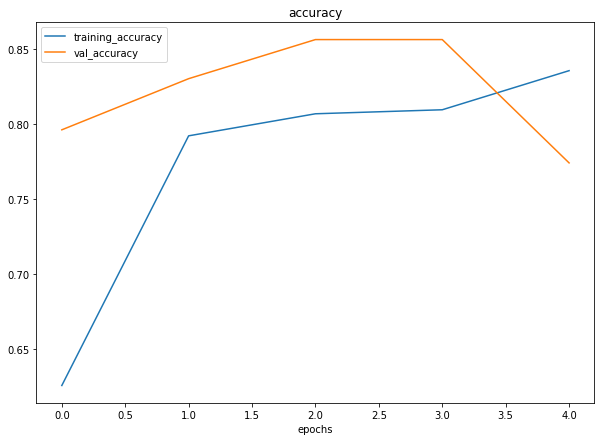

In [41]:
# Checkout the loss and accuracy of model_5
plot_loss_curves(history_5)

### Opening our bag of tricks and finding data augmentation

In [42]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

In [43]:
# Import data and augment it from training directory
print("Augmentedd training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode="binary",
                                                                  shuffle=False)

# Create non-augmented train data batches
print("Non-augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode="binary",
                                              shuffle=False)

IMG_SIZE = (224, 224)
# Create non-augmented test data batches
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                            target_size=IMG_SIZE,
                                            batch_size=32,
                                            class_mode="binary",
                                            shuffle=False)

Augmentedd training data
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


Data augmentation is usually only performed on **training data**. Using `ImageDataGenerator` built-in data augmentation parameters to our images are left as they are in the directories but are modified as they're loaded into the model. Intinya, data augmentation hanya perlu digunakan untuk training data, dan kita berharap model yang dihasilkan memiliki performa yang baik untuk test_data

Let's visualize some augmented data!!

In [44]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

showing image number: 17


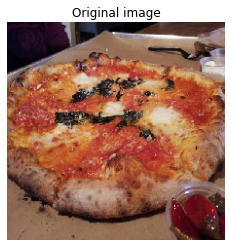

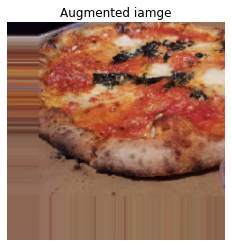

In [45]:
# Show the original image and augmented image
import random
random_number = random.randint(0, 31)
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented iamge")
plt.axis(False);

In [46]:
# Create a nidek (same as model_5)
model_6 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_6.compile(loss="binary_crossentropy",
               optimizer=Adam(),
               metrics=["accuracy"])

# Fit the model
history_6 = model_6.fit(train_data_augmented,
                       epochs=5,
                       steps_per_epoch=len(train_data_augmented),
                       validation_data=test_data,
                       validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 535ms/step - loss: 0.7014 - accuracy: 0.5273 - val_loss: 0.6854 - val_accuracy: 0.5040
Epoch 2/5
47/47 [==============================] - 23s 499ms/step - loss: 0.6865 - accuracy: 0.5433 - val_loss: 0.6528 - val_accuracy: 0.6360
Epoch 3/5
47/47 [==============================] - 24s 518ms/step - loss: 0.6620 - accuracy: 0.5920 - val_loss: 0.6670 - val_accuracy: 0.5300
Epoch 4/5
47/47 [==============================] - 25s 542ms/step - loss: 0.6942 - accuracy: 0.5507 - val_loss: 0.6085 - val_accuracy: 0.7980
Epoch 5/5
47/47 [==============================] - 25s 526ms/step - loss: 0.6385 - accuracy: 0.6540 - val_loss: 0.5109 - val_accuracy: 0.8160


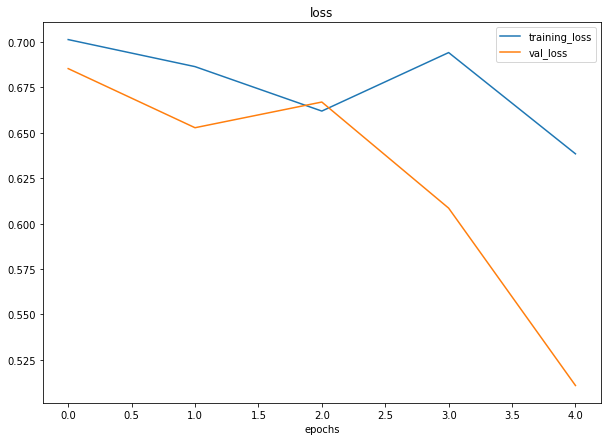

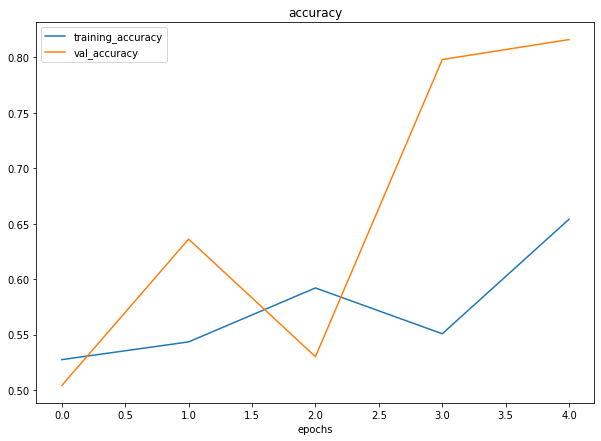

In [47]:
# Check our models training learning curves
plot_loss_curves(history_6)

Let's shuffle our augmented data

In [48]:
# Import data and augment it and shuffle from training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                           target_size=(224, 224),
                                                                           class_mode="binary",
                                                                           shuffle=True)

Found 1500 images belonging to 2 classes.


In [49]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_7.compile(loss="binary_crossentropy",
               optimizer=Adam(),
               metrics=["accuracy"])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled,
                       epochs=5,
                       steps_per_epoch=len(train_data_augmented_shuffled),
                       validation_data=test_data,
                       validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 541ms/step - loss: 0.6332 - accuracy: 0.6373 - val_loss: 0.5522 - val_accuracy: 0.6580
Epoch 2/5
47/47 [==============================] - 24s 520ms/step - loss: 0.5112 - accuracy: 0.7520 - val_loss: 0.3904 - val_accuracy: 0.8340
Epoch 3/5
47/47 [==============================] - 25s 530ms/step - loss: 0.4910 - accuracy: 0.7713 - val_loss: 0.4001 - val_accuracy: 0.8120
Epoch 4/5
47/47 [==============================] - 25s 525ms/step - loss: 0.4817 - accuracy: 0.7700 - val_loss: 0.3208 - val_accuracy: 0.8680
Epoch 5/5
47/47 [==============================] - 24s 510ms/step - loss: 0.4690 - accuracy: 0.7860 - val_loss: 0.3266 - val_accuracy: 0.8600


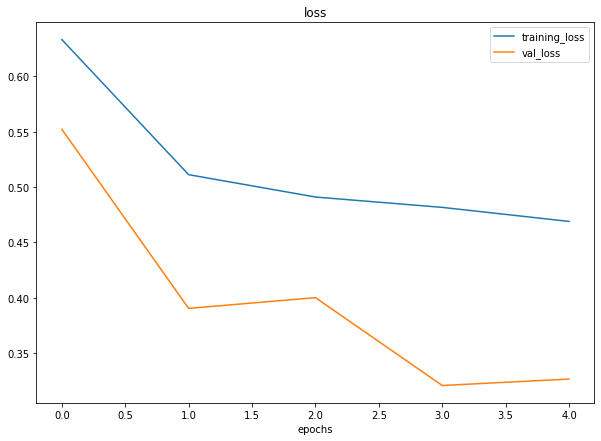

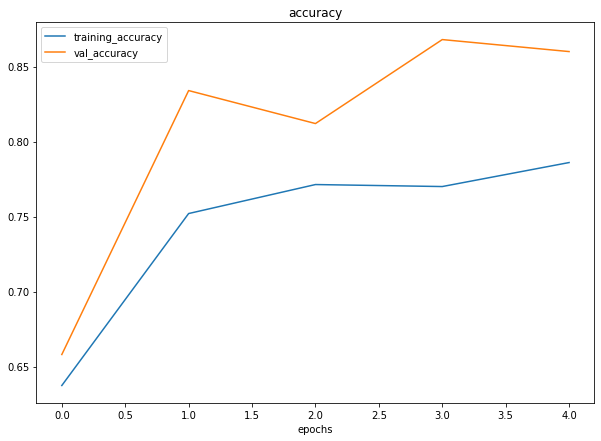

In [50]:
# Plot loss curves
plot_loss_curves(history_7)

### 7. Repeat until satisfied

there are a few things we could try to continue improve our model:

* Increase the number of model layers
* Increase the number of filters in each convolutional layer
* Train for longer (more epochs)
* Find a ideal learning rate
* Get more data (give the model more opportunities to learn)
* Use **transfer learning** to leverage whate another image model has learn and adjust it for our own use case

## Making a prediction with our trained model on our own custom data

In [51]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


--2023-01-24 11:53:29--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.02s   

2023-01-24 11:53:30 (84.2 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



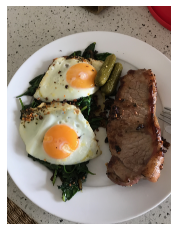

In [52]:
# View our example image
import matplotlib.image as mpimg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [53]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

In [54]:
# Create a function to import and image and resize it to be able to be used with our model_7
def load_and_prep_image(filename, img_shape=224):
    """
    Reads an image from filename, turns it into a tensor and reshapes it 
    to (img_shape, color_channels)
    """
    # Read in the image
    img = tf.io.read_file(filename)
    # Decode the read file into a tensor
    img = tf.image.decode_image(img)
    # Resize the image
    img = tf.image.resize(img, size=[img_shape, img_shape])
    # Rescale the image (get all values between 0 and 1)
    img = img/255
    return img

In [55]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [56]:
pred = model_7.predict(tf.expand_dims(steak, axis=0))

Looks like our custom image is being put through our model, however, it currently outputs a prediction probability, wouldn't it be nice if we could visualize the image as well as the model's prediction?

In [57]:
# Remind ourselves of our class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [58]:
# We can index the predicted class by rounding the prediction probability and indexing it on our clas_names
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [59]:
def pred_and_plot(model, filename, class_names=class_names):
    """
    Imports an image located at filename, makes a prediction with model 
    and plots the image with the predicted class as the title
    """
    #Import the target image and preprocess it
    img = load_and_prep_image(filename)
    # Make a prediction
    pred = model.predict(tf.expand_dims(img, axis=0))
    print(pred)
    # Get the predicted class
    pred_class = class_names[int(tf.round(pred))]
    # Plot the image and predicted class
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False)

[[0.86514163]]


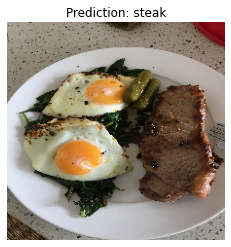

In [60]:
pred_and_plot(model_7, "03-steak.jpeg")

--2023-01-24 11:53:37--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.03s   

2023-01-24 11:53:37 (104 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

[[0.29308167]]


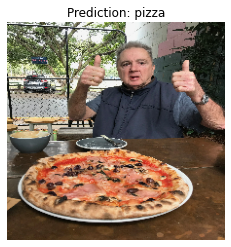

In [61]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_7, "03-pizza-dad.jpeg")

YAH SALAH WKWKWK

# Multi-class Image Classification

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a basline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust diffrent hyperparameters to improve the model (try to beat baseline)
7. Repeat it until satisfied

## 1. Import and become one with the data

In [62]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-01-24 11:53:39--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.216.128, 172.217.193.128, 74.125.31.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.216.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  31.3MB/s    in 15s     

2023-01-24 11:53:55 (33.2 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [63]:
import os

# Walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in 10_food_classes_all_data
There are 10 directories and 0 images in 10_food_classes_all_data/train
There are 0 directories and 750 images in 10_food_classes_all_data/train/chicken_wings
There are 0 directories and 750 images in 10_food_classes_all_data/train/ramen
There are 0 directories and 750 images in 10_food_classes_all_data/train/steak
There are 0 directories and 750 images in 10_food_classes_all_data/train/ice_cream
There are 0 directories and 750 images in 10_food_classes_all_data/train/chicken_curry
There are 0 directories and 750 images in 10_food_classes_all_data/train/pizza
There are 0 directories and 750 images in 10_food_classes_all_data/train/sushi
There are 0 directories and 750 images in 10_food_classes_all_data/train/grilled_salmon
There are 0 directories and 750 images in 10_food_classes_all_data/train/fried_rice
There are 0 directories and 750 images in 10_food_classes_all_data/train/hamburger
There are 10 directories and 0 imag

In [64]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [65]:
# Let's get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['3691049.jpg']
Image shape: (512, 512, 3)


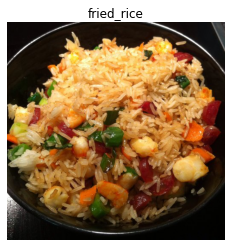

In [66]:
# Visualize, visualize, visualize
import random
img = view_random_image(target_dir=train_dir,
                       target_class=random.choice(class_names))

### 2. Preprocess the data

In [67]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                            target_size=(224, 224),
                                            batch_size=32,
                                            class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a CNN Model (baseline model)

In [68]:
# Create the model (basline)
model_8 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="softmax")
])

In [69]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation
from tensorflow.keras.optimizers import Adam

# Create the model (baseline)
model_9 = Sequential([
    Conv2D(10, 3, input_shape=(224, 224, 3)),
    Activation("relu"),
    Conv2D(10, 3),
    Activation("relu"),
    MaxPool2D(),
    Conv2D(10, 3),
    Activation("relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10),
    Activation("softmax")
])

# Update (sama aja si sebenernya)
# Create the model (basline)
model_9 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

# Compile the model
model_9.compile(loss="categorical_crossentropy",
               optimizer=Adam(),
               metrics=["accuracy"])

### 4. Fit the model

In [70]:
# Fit the model
history_9 = model_9.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=test_data,
                       validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 50s 208ms/step - loss: 2.1762 - accuracy: 0.1991 - val_loss: 2.0382 - val_accuracy: 0.2788
Epoch 2/5
235/235 [==============================] - 50s 211ms/step - loss: 1.9378 - accuracy: 0.3257 - val_loss: 1.8933 - val_accuracy: 0.3272
Epoch 3/5
235/235 [==============================] - 50s 212ms/step - loss: 1.7387 - accuracy: 0.4065 - val_loss: 1.8776 - val_accuracy: 0.3512
Epoch 4/5
235/235 [==============================] - 49s 210ms/step - loss: 1.3687 - accuracy: 0.5468 - val_loss: 2.0267 - val_accuracy: 0.3408
Epoch 5/5
235/235 [==============================] - 48s 205ms/step - loss: 0.7181 - accuracy: 0.7732 - val_loss: 2.4708 - val_accuracy: 0.2980


### 5. Evaluate the model

In [71]:
# Evaluate on the test data
model_9.evaluate(test_data)

79/79 [==============================] - 12s 150ms/step - loss: 2.4708 - accuracy: 0.2980


[2.4707834720611572, 0.2980000078678131]

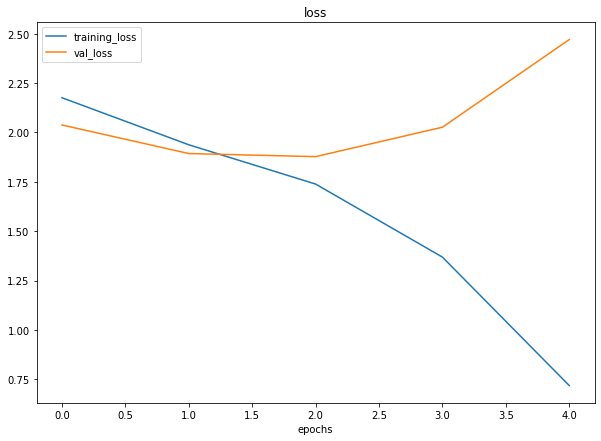

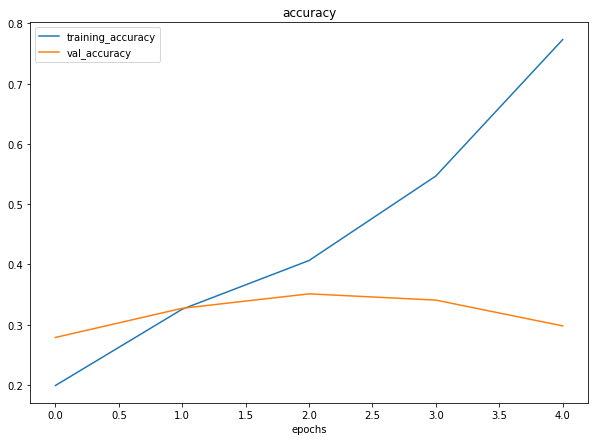

In [72]:
# Plot learning curve
plot_loss_curves(history_9)

### 6. Adjust the model parameters

In [73]:
# Try a simplified model (removed two layers)
model_10 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

# Compile the model
model_10.compile(loss="categorical_crossentropy",
                 optimizer=Adam(),
                 metrics=["accuracy"])

# Fit the model
history_10 = model_10.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 49s 207ms/step - loss: 2.1801 - accuracy: 0.2208 - val_loss: 1.9785 - val_accuracy: 0.2924
Epoch 2/5
235/235 [==============================] - 48s 206ms/step - loss: 1.8463 - accuracy: 0.3633 - val_loss: 1.9474 - val_accuracy: 0.3292
Epoch 3/5
235/235 [==============================] - 48s 205ms/step - loss: 1.5638 - accuracy: 0.4793 - val_loss: 1.9185 - val_accuracy: 0.3376
Epoch 4/5
235/235 [==============================] - 47s 200ms/step - loss: 1.1409 - accuracy: 0.6396 - val_loss: 2.0334 - val_accuracy: 0.3352
Epoch 5/5
235/235 [==============================] - 47s 199ms/step - loss: 0.6746 - accuracy: 0.7968 - val_loss: 2.4362 - val_accuracy: 0.3208


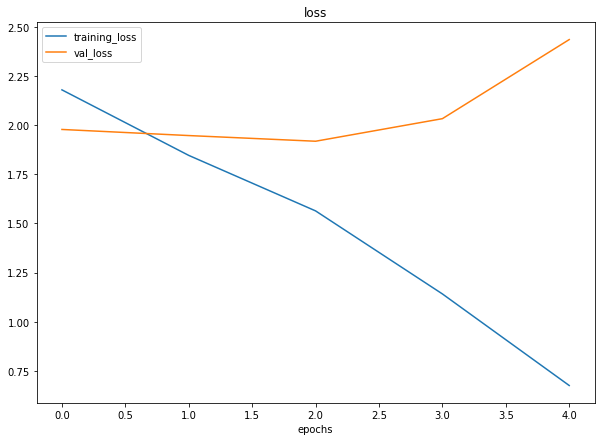

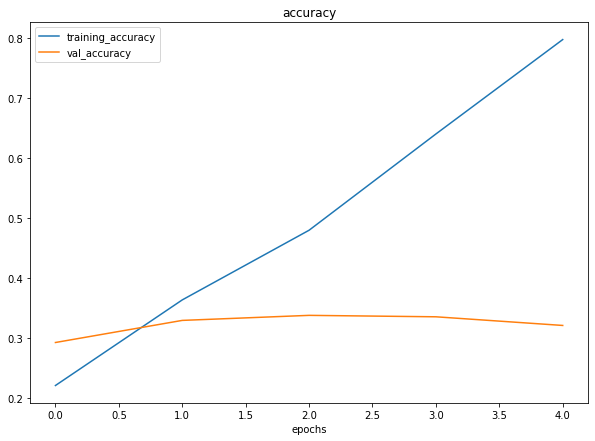

In [74]:
# Checkout the loss curves of model_10
plot_loss_curves(history_10)

In [75]:
# Create augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [76]:
# Clone the model (use the same architecture)
model_11 = tf.keras.models.clone_model(model_10)

# Compile the cloned model (same setup as used for model_10)
model_11.compile(loss="categorical_crossentropy",
                 optimizer=Adam(),
                 metrics=["accuracy"])

# Fit the model
history_11 = model_11.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 121s 515ms/step - loss: 2.2092 - accuracy: 0.2045 - val_loss: 2.0061 - val_accuracy: 0.2964
Epoch 2/5
235/235 [==============================] - 120s 512ms/step - loss: 2.0611 - accuracy: 0.2700 - val_loss: 1.9444 - val_accuracy: 0.3056
Epoch 3/5
235/235 [==============================] - 121s 516ms/step - loss: 1.9967 - accuracy: 0.2921 - val_loss: 1.9398 - val_accuracy: 0.3240
Epoch 4/5
235/235 [==============================] - 121s 516ms/step - loss: 1.9776 - accuracy: 0.3073 - val_loss: 1.8691 - val_accuracy: 0.3524
Epoch 5/5
235/235 [==============================] - 121s 516ms/step - loss: 1.9401 - accuracy: 0.3280 - val_loss: 1.7577 - val_accuracy: 0.3940


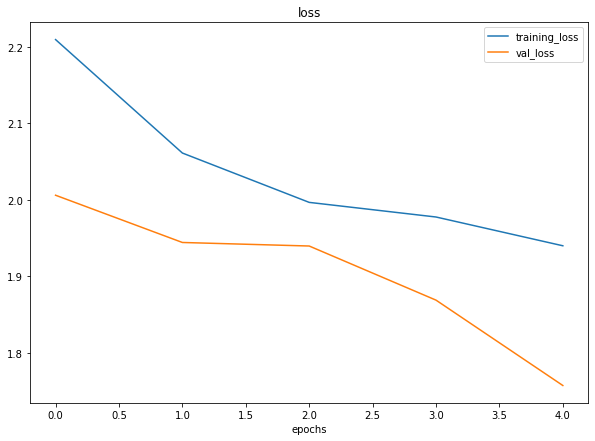

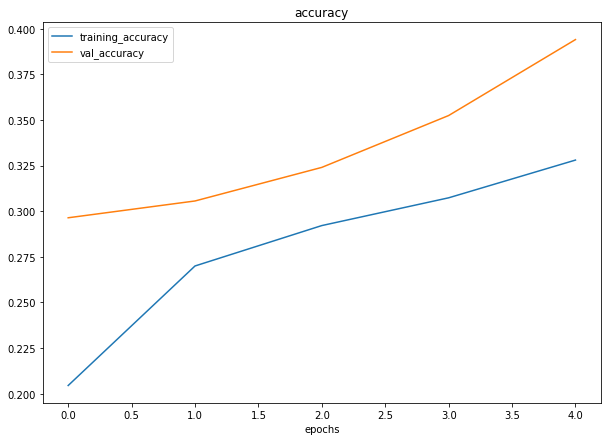

In [77]:
# Check out our model's performance with augmented data
plot_loss_curves(history_11)

### 7. Repeat unti satisfied

- restructuring our model's architecture (increasing layers/hidden units)
- adjust learning rate
- try different method in data augmentation (change the hyperparameters)
- training for longer (e.g. 10 epochs)
- try **transfer learning**

### Making a prediction with our trained model

In [78]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [79]:
# -q is for "quiet"
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg     

In [80]:
def pred_and_plot(model, filename, class_names=class_names):
    """
    Imports an image located at filename, makes a prediction with model 
    and plots the image with the predicted class as the title
    """
    #Import the target image and preprocess it
    img = load_and_prep_image(filename)
    # Make a prediction
    pred = model.predict(tf.expand_dims(img, axis=0))

    # Get the predicted class
    if len(pred[0]) > 1:
      pred_class = class_names[tf.argmax(pred[0])]
    else:
      pred_class = class_names[int(tf.round(pred[0]))]

    # Plot the image and predicted class
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False)

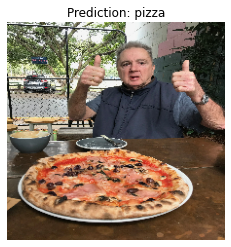

In [81]:
# Make a prediction using model_11
pred_and_plot(model_11, filename="03-pizza-dad.jpeg",
              class_names=class_names)

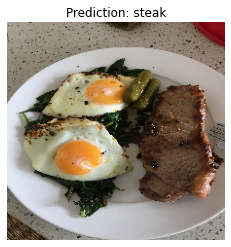

In [82]:
# Make a prediction using model_11
pred_and_plot(model_11, filename="03-steak.jpeg",
              class_names=class_names)

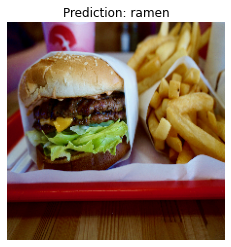

In [83]:
# Make a prediction using model_11
pred_and_plot(model_11, filename="03-hamburger.jpeg",
              class_names=class_names)

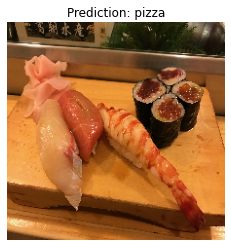

In [84]:
# Make a prediction using model_11
pred_and_plot(model_11, filename="03-sushi.jpeg",
              class_names=class_names)

payah ya modelnya, itu karena akurasinya ~30% an

## Saving and loading our model

In [85]:
# Save a model
model_11.save("saved_trained_model_11")

2023-01-24 12:15:03.009362: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


In [86]:
# Load in a trained model and evaluate it 
loaded_model_11 = tf.keras.models.load_model("saved_trained_model_11")
loaded_model_11.evaluate(test_data)

79/79 [==============================] - 12s 150ms/step - loss: 1.7577 - accuracy: 0.3940


[1.7577130794525146, 0.39399999380111694]

In [87]:
# Compate our loaded model to our existing model
model_11.evaluate(test_data)

79/79 [==============================] - 12s 145ms/step - loss: 1.7577 - accuracy: 0.3940


[1.7577130794525146, 0.39399999380111694]